In [1]:
%matplotlib inline

import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

np.set_printoptions(precision=3, suppress=True)

# 2. Zadanie programowania kwadratowego bez ograniczeń

Dany jest problem optymalizacji bez ograniczeń w następującej formie [1]  

$$
\min_{x_1, x_2} \; 3x_1^2 + x_2^2 + 2x_1x_2 + x_1 + 6x_2 + 2 
$$

---
Źródło [[1]](https://optimization.mccormick.northwestern.edu/index.php/Quadratic_programming) (25.08.2021)  

---

Rysunek funkcji celu w przestrzeni trójwymiarowej

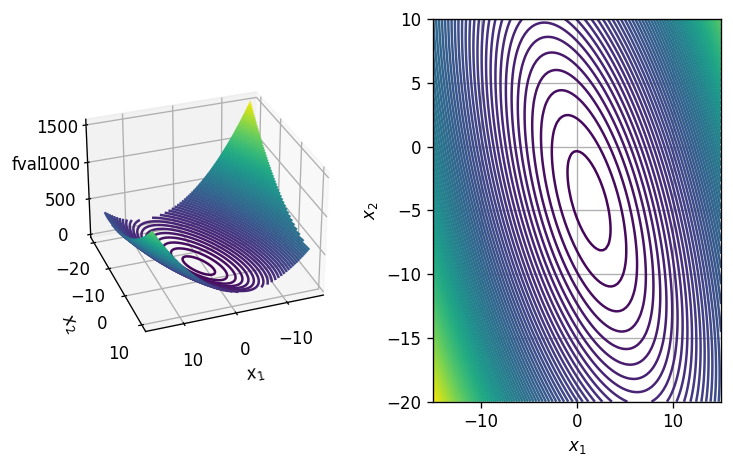

In [2]:
def obj(x1, x2):
    return 3 * x1 ** 2 + x2 ** 2 + 2 * x1 * x2 + x1 + 6 * x2 + 2


x1 = np.linspace(-15, 15, 101)
x2 = np.linspace(-20, 10, 101)

X1, X2 = np.meshgrid(x1, x2)
fval = obj(X1, X2)

fig = plt.figure(dpi=120)
fig.set_tight_layout(True)
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.contour3D(X1, X2, fval, 100)
ax1.view_init(30, 70)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_zlabel("fval")
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X1, X2, fval, 100)
ax2.grid()
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$");

Rozwiązanie zadania optymalizacji algorytmem "Differential evolution"

In [3]:
def cfun(x):
    return 3 * x[0] ** 2 + x[1] ** 2 + 2 * x[0] * x[1] + x[0] + 6 * x[1] + 2


bounds = opt.Bounds([-1e6, -1e6], [1e6, 1e6])

opt_funval = []
opt_x = []
opt_times = []

for i in range(1, 100):
    start = time.time()
    result = opt.differential_evolution(cfun, bounds, polish=False)
    #     result = opt.minimize(cfun, x0=[1, 1], method='BFGS')
    end = time.time()
    opt_funval.append(result.fun)
    opt_x.append(result.x)
    opt_times.append(end - start)

In [4]:
print(f"{np.mean(opt_funval):.3f}")

-10.123


In [5]:
print(f"{np.mean(opt_x, 0)}")

[ 1.251 -4.251]


In [6]:
print(f"{np.mean(opt_times):.3f}")

0.087
